# E-commerce Data Analysis: Descriptive, Diagnostic, Predictive, and Prescriptive Analytics

## Introduction

In this notebook, we will explore and analyse e-commerce data using the four main types of analytics:

- **Descriptive Analytics**: Provides insights into what has happened.
- **Diagnostic Analytics**: Helps explain why something happened.
- **Predictive Analytics**: Forecasts what might happen in the future based on past data.
- **Prescriptive Analytics**: Recommends actions based on the insights derived.

### Why are we doing this analysis?

E-commerce businesses generate vast amounts of data through their operations. By applying different types of analytics, we can extract valuable insights that can help in decision-making, improving operations, and ultimately, driving business growth. This analysis will help us understand customer behaviour, identify trends, predict future sales, and make data-driven recommendations.

### Key Concepts Covered:
- Understand the different types of analytics (Descriptive, Diagnostic, Predictive, Prescriptive)
- Perform data cleansing to deal with missing/duplicate values
- Perform each type of analysis using e-commerce data
- Build a predictive model to forecast sales based on discounts
- Provide recommendations for future actions using prescriptive analytics

## Step 1: Importing and Exploring Data

### What are we doing?
In this step, we're loading the e-commerce data from a CSV file into a pandas DataFrame and taking a first look at its structure.

### Why are we doing it?
Before we can analyse the data, we need to load it into our working environment. Exploring the first few rows helps us understand the structure of our data, including what columns we have and what kind of information each column contains.

In [10]:
import pandas as pd

# Load the CSV file
file_path = 'ecommerce_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(df.head())

# Display information about the DataFrame
print(df.info())

   customer_id  order_id  order_date  product_id product_category  \
0           52      1001  2023-01-01         134           Sports   
1           93      1002  2023-01-02         108      Electronics   
2           15      1003  2023-01-03         140           Sports   
3           72      1004  2023-01-04         183           Sports   
4           61      1005  2023-01-05         142       Home Decor   

   product_price  quantity     revenue  discount web_traffic_source  \
0            392         3  132.491483        45             Google   
1             77         4  179.868736        43             Google   
2            375         1  350.985646        43           Facebook   
3            381         3  360.287920        30             Direct   
4            223         3  336.964856        32           Facebook   

  customer_age_group customer_region  customer_lifetime_value  
0              26-35          London                     1123  
1              26-35      Sout

### Interpretation:
After running this code, we can see the first few rows of our dataset and get an overview of its structure. We can observe:
- The types of information we have (e.g., customer details, order information, product details)
- The data types of each column
- Any immediately apparent issues (like missing values)

This initial exploration sets the stage for our data cleaning and subsequent analysis.

## Step 2: Data Cleaning

### What are we doing?
In this step, we're preparing our data for analysis by handling missing values, converting data types, and removing duplicates.

### Why are we doing it?
Clean, consistent data is crucial for accurate analysis. Missing values, incorrect data types, and duplicates can lead to errors in our calculations and misinterpretations in our analysis.

Let's first look at the state of our data before cleaning:

In [11]:
print("Before Cleaning:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              1000 non-null   int64  
 1   order_id                 1000 non-null   int64  
 2   order_date               1000 non-null   object 
 3   product_id               1000 non-null   int64  
 4   product_category         1000 non-null   object 
 5   product_price            1000 non-null   int64  
 6   quantity                 1000 non-null   int64  
 7   revenue                  1000 non-null   float64
 8   discount                 1000 non-null   int64  
 9   web_traffic_source       1000 non-null   object 
 10  customer_age_group       878 non-null    object 
 11  customer_region          900 non-null    object 
 12  customer_lifetime_value  1000 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 101.7+ KB
Non

Now, let's clean our data:

In [12]:
# Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Fill missing values for 'customer_age_group' and 'customer_region' 
df['customer_age_group'] = df['customer_age_group'].fillna('Unknown')
df['customer_region'] = df['customer_region'].fillna('Unknown')

# Check for duplicates and drop them
df.drop_duplicates(inplace=True)

# Confirm the data is clean
print("After Cleaning:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              1000 non-null   int64         
 1   order_id                 1000 non-null   int64         
 2   order_date               1000 non-null   datetime64[ns]
 3   product_id               1000 non-null   int64         
 4   product_category         1000 non-null   object        
 5   product_price            1000 non-null   int64         
 6   quantity                 1000 non-null   int64         
 7   revenue                  1000 non-null   float64       
 8   discount                 1000 non-null   int64         
 9   web_traffic_source       1000 non-null   object        
 10  customer_age_group       1000 non-null   object        
 11  customer_region          1000 non-null   object        
 12  customer_lifetime_v

### Interpretation:
After cleaning:
- The 'order_date' column is now in datetime format, allowing for time-based analysis.
- Missing values in 'customer_age_group' and 'customer_region' are filled with 'Unknown', preserving these records for analysis while clearly marking the missing information.
- Any duplicate rows have been removed, ensuring each record is unique.
- We can now proceed with our analysis on this cleaned dataset.

The before and after comparison allows us to see the impact of our cleaning steps and confirms that our data is now ready for analysis.

## Step 3: Descriptive Analytics

### What are we doing?
In this step, we're performing descriptive analytics to summarise our dataset and visualise key aspects of our e-commerce data.

### Why are we doing it?
Descriptive analytics helps us understand what has happened in our business. It provides a summary of historical data, which can reveal patterns and insights about our customers, products, and sales.

       customer_id     order_id           order_date  product_id  \
count  1000.000000  1000.000000                 1000  1000.00000   
mean     50.128000  1500.500000  2024-05-14 12:00:00   149.94800   
min       1.000000  1001.000000  2023-01-01 00:00:00   101.00000   
25%      24.000000  1250.750000  2023-09-07 18:00:00   125.00000   
50%      51.000000  1500.500000  2024-05-14 12:00:00   149.00000   
75%      75.000000  1750.250000  2025-01-19 06:00:00   175.00000   
max     100.000000  2000.000000  2025-09-26 00:00:00   200.00000   
std      29.573505   288.819436                  NaN    29.13304   

       product_price     quantity      revenue     discount  \
count    1000.000000  1000.000000  1000.000000  1000.000000   
mean      259.177000     2.473000   395.186639    24.684000   
min        10.000000     1.000000    91.605571     0.000000   
25%       136.000000     1.000000   280.545795    13.000000   
50%       267.500000     2.000000   395.893598    25.000000   
75%      

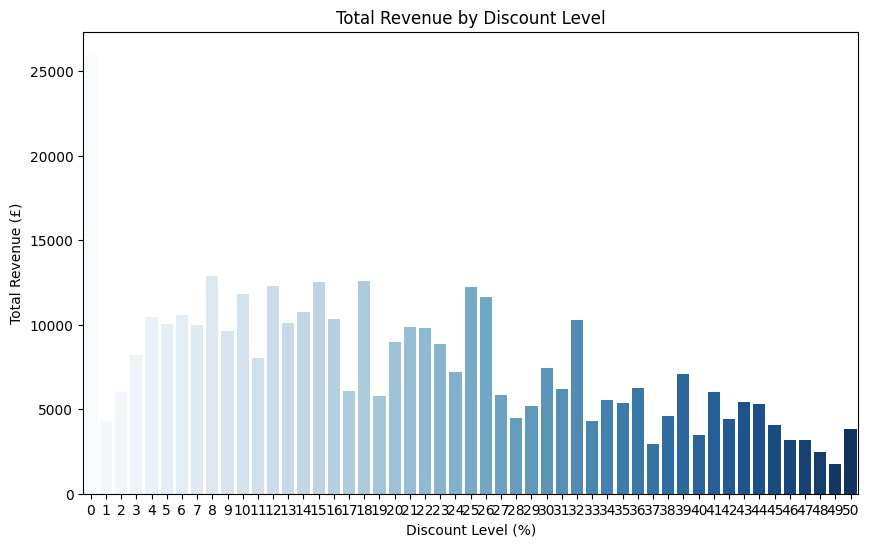

In [13]:
# Descriptive statistics for numerical data
print(df.describe())

# Aggregating total revenue by discount level
import matplotlib.pyplot as plt
import seaborn as sns

discount_revenue = df.groupby('discount')['revenue'].sum().reset_index()

# Plotting total revenue by discount level with hue set to discount
plt.figure(figsize=(10, 6))
sns.barplot(x='discount', y='revenue', data=discount_revenue, hue='discount', palette='Blues', legend=False)
plt.title('Total Revenue by Discount Level')
plt.xlabel('Discount Level (%)')
plt.ylabel('Total Revenue (£)')
plt.show()

### Interpretation:
From the descriptive statistics, we can observe:
- The range of values for key metrics like revenue, product price, and quantity.
- The distribution of these metrics (mean, median, min, max).

From the bar plot of Total Revenue by Discount Level:
- We can see how different discount levels affect total revenue.
- There seems to be a general trend where higher discounts are associated with lower total revenue, but this relationship isn't perfectly linear.
- Some moderate discount levels (e.g., around 20-30%) seem to generate substantial revenue, suggesting they might be effective in driving sales without overly compromising on revenue.

This information provides a foundation for further investigation into pricing and discount strategies.

## Step 4: Diagnostic Analytics

### What are we doing?
In this step, we're diving deeper into our data to understand relationships between variables and potentially uncover reasons behind the patterns we observed in our descriptive analysis.

### Why are we doing it?
Diagnostic analytics helps us understand why certain things happened. By examining correlations and relationships between variables, we can start to form hypotheses about what drives our business outcomes.

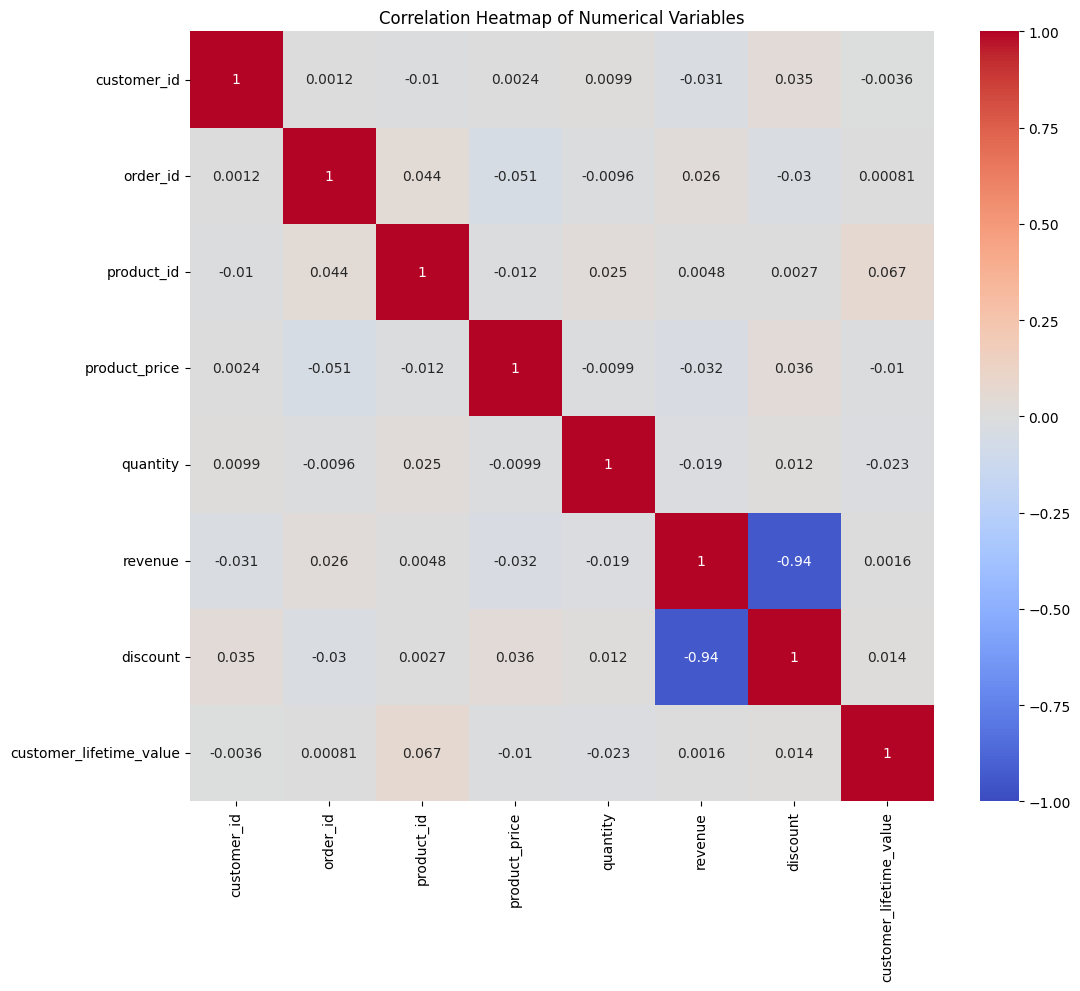

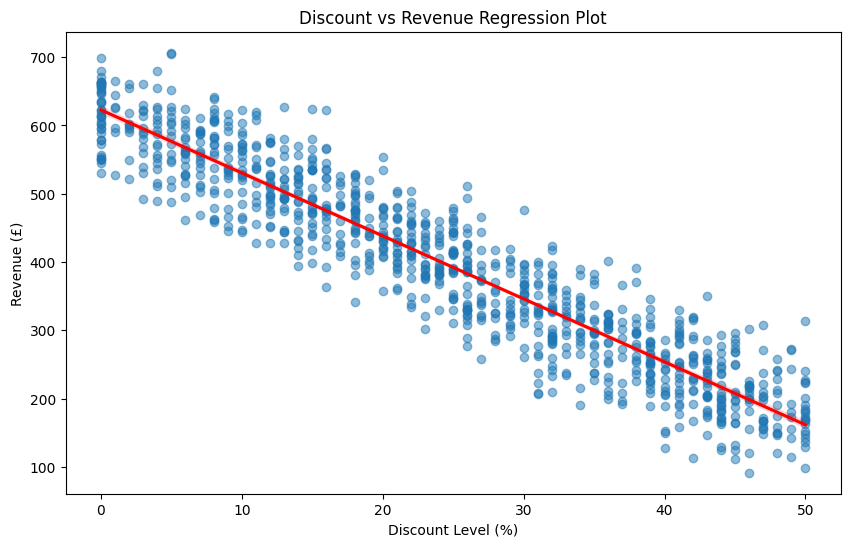

In [14]:
# Select only numerical columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Plotting a regression plot for Discount vs Revenue
plt.figure(figsize=(10, 6))
sns.regplot(x='discount', y='revenue', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Discount vs Revenue Regression Plot')
plt.xlabel('Discount Level (%)')
plt.ylabel('Revenue (£)')
plt.show()

### Interpretation:
From the correlation heatmap:
- We can see the strength and direction of relationships between our numerical variables.
- Strong positive correlations appear in red, while strong negative correlations appear in blue.
- Pay attention to correlations with 'revenue' to understand what factors might be driving our sales.

From the Discount vs Revenue regression plot:
- We can see the relationship between discount level and revenue for individual transactions.
- The red line shows the overall trend: as discount increases, revenue tends to decrease.
- However, there's significant scatter around this line, indicating that other factors also influence revenue.
- This suggests that while higher discounts generally lead to lower revenue per transaction, the relationship is not straightforward and may be influenced by other factors (e.g., product category, customer segment).

These insights can guide further investigation into pricing strategies and help identify areas where targeted discounts might be most effective.

## Step 5: Predictive Analytics

### What are we doing?
In this step, we're building a simple predictive model to forecast revenue based on product price, quantity, and discount.

### Why are we doing it?
Predictive analytics allows us to make informed guesses about future outcomes based on historical data. By building a model to predict revenue, we can start to understand how changes in our business practices (like adjusting prices or discounts) might affect our future sales.

Mean Squared Error: 2257.5517213609214
R-squared Score: 0.8827865145576672


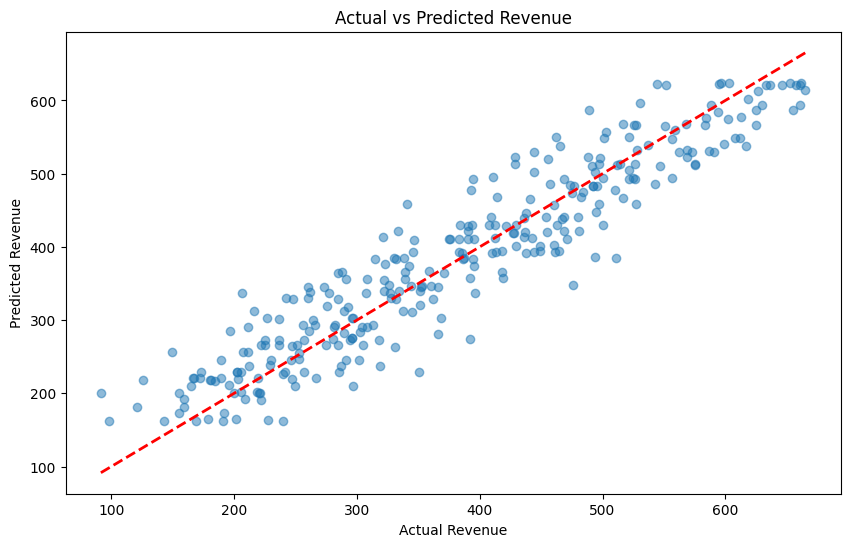

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features and target variable for regression model
X = df[['product_price', 'quantity', 'discount']]
y = df['revenue']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()

### Interpretation:
From the model evaluation:
- The Mean Squared Error (MSE) tells us the average squared difference between predicted and actual revenues. A lower MSE indicates better predictions.
- The R-squared score indicates the proportion of variance in the revenue that's predictable from our features. An R-squared closer to 1 indicates a better fit.

From the Actual vs Predicted Revenue plot:
- Points closer to the red dashed line indicate more accurate predictions.
- Scatter around the line shows where our model over- or under-predicts.
- The overall pattern can indicate if our model tends to perform better for certain revenue ranges.

This model provides a starting point for revenue prediction, but its performance suggests there may be other important factors influencing revenue that we haven't accounted for. This could guide further feature engineering or the exploration of more complex models.

## Step 6: Prescriptive Analytics

### What are we doing?
In this final step, we're using the insights gained from our previous analyses to make data-driven recommendations for business actions.

### Why are we doing it?
Prescriptive analytics takes us from understanding what happened and why, to recommending what should be done next. It's about turning our insights into actionable strategies to improve business performance.

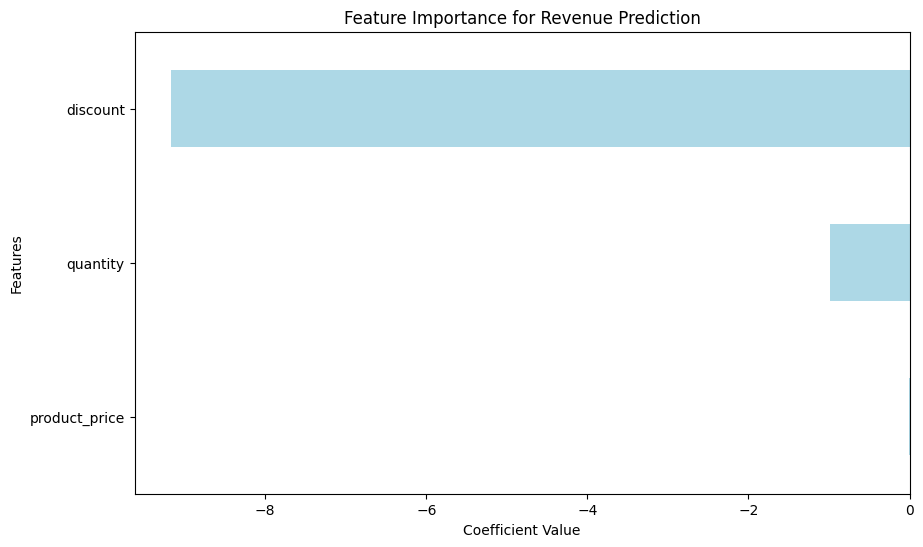

customer_age_group
56+        0.236
46-55      0.192
36-45      0.168
26-35      0.152
18-25      0.144
Unknown    0.108
Name: proportion, dtype: float64
customer_region
Midlands      0.240
South East    0.196
South West    0.180
North West    0.152
London        0.136
Unknown       0.096
Name: proportion, dtype: float64


In [16]:
# Feature importance based on model coefficients
feature_importance = pd.Series(model.coef_, index=X.columns)

# Plotting feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color='lightblue')
plt.title('Feature Importance for Revenue Prediction')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

# Analyse high-value customers
high_value_customers = df[df['customer_lifetime_value'] > df['customer_lifetime_value'].quantile(0.75)]
print(high_value_customers['customer_age_group'].value_counts(normalize=True))
print(high_value_customers['customer_region'].value_counts(normalize=True))

### Interpretation:
From the Feature Importance plot:
- We can see which features have the strongest impact on our revenue predictions.
- Positive values indicate features that tend to increase revenue, while negative values decrease revenue.
- This can guide decisions on which aspects of the business to focus on for maximising revenue.

From the high-value customer analysis:
- We can see the distribution of age groups and regions among our highest-value customers.
- This information can guide targeted marketing efforts and customer retention strategies.

### Prescriptive Recommendations:
Based on our analyses, here are some actionable recommendations:

1. Optimise Discount Strategy: Our analysis showed that higher discounts generally lead to lower revenue. Consider implementing a more nuanced discount strategy, perhaps offering moderate discounts (20-30%) which seemed to balance increased sales with maintained revenue.

2. Focus on High-Value Customers: Tailor marketing and retention efforts towards the age groups and regions that are over-represented in our high-value customer segment. This could involve creating specific promotions or loyalty programmes for these groups.

3. Pricing Strategy: Given the importance of product price in our predictive model, consider a dynamic pricing strategy that takes into account other factors like quantity and customer segment to optimise revenue.

4. Product Bundle Optimisation: Since quantity played a role in our revenue predictions, explore creating product bundles or volume discounts that encourage larger purchases while maintaining healthy margins.

5. Customer Segmentation: Develop more detailed customer segments based on age, region, and lifetime value. Use these segments to create more personalised marketing campaigns and product recommendations.

6. Continuous Monitoring: Implement a system to continuously monitor these metrics and update the predictive model. This will allow for quick adjustments to strategies as market conditions or customer behaviours change.

By implementing these recommendations and continuing to analyse their effects, the e-commerce business can work towards optimising its operations and improving its financial performance.

## Conclusion

In this notebook, we've taken a comprehensive journey through the world of e-commerce analytics. We've explored our data using descriptive analytics to understand what has happened, used diagnostic analytics to uncover why certain patterns exist, leveraged predictive analytics to forecast future revenues, and finally applied prescriptive analytics to recommend actionable strategies.

Key takeaways from our analysis include:
1. The importance of data cleaning in preparing for accurate analysis.
2. The complex relationship between discounts and revenue.
3. The potential for targeted strategies based on customer segmentation.
4. The value of predictive modeling in understanding business drivers.

Remember, analytics is an iterative process. As you implement changes based on these insights, continue to monitor your data, refine your models, and adjust your strategies accordingly. The e-commerce landscape is dynamic, and staying data-driven will help you remain competitive and successful.

Next steps could include:
1. Implementing A/B tests to validate some of our recommendations.
2. Exploring more advanced machine learning models for prediction.
3. Diving deeper into customer segmentation and personalisation strategies.
4. Incorporating external data (e.g., economic indicators, competitor pricing) into our analysis.

Keep exploring, keep analysing, and keep innovating!